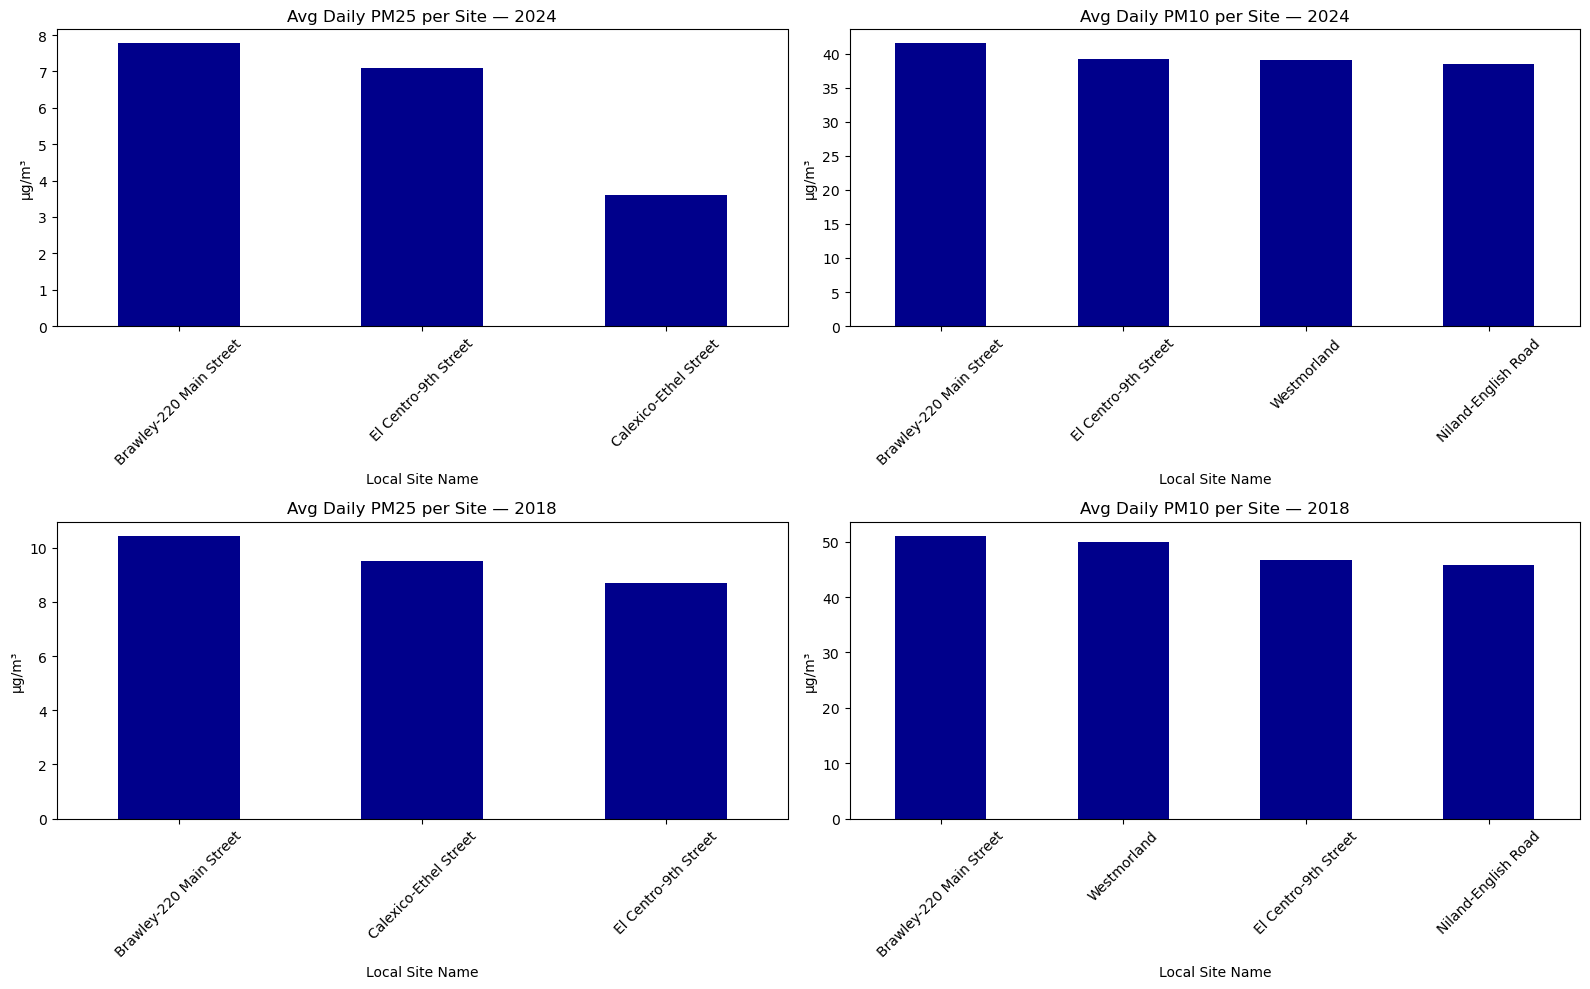


 Average Daily PM25 Concentration per Site — 2024


,PM25 µg/m³
Local Site Name,
Brawley-220 Main Street,7.770219
Calexico-Ethel Street,3.600000
El Centro-9th Street,7.098315



 Average Daily PM10 Concentration per Site — 2024


,PM10 µg/m³
Local Site Name,
Brawley-220 Main Street,41.491803
El Centro-9th Street,39.139726
Niland-English Road,38.491758
Westmorland,39.117486



 Average Daily PM25 Concentration per Site — 2018


,PM25 µg/m³
Local Site Name,
Brawley-220 Main Street,10.433613
Calexico-Ethel Street,9.500000
El Centro-9th Street,8.700820



 Average Daily PM10 Concentration per Site — 2018


,PM10 µg/m³
Local Site Name,
Brawley-220 Main Street,51.052778
El Centro-9th Street,46.773109
Niland-English Road,45.830084
Westmorland,50.024931


In [3]:
!pip install openpyxl

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "Files/New EPA Monitor Data.xlsx"
xlsx = pd.ExcelFile(file_path)

# Map PM type to column name
pm_col_map = {
    "25": "Daily Mean PM2.5 Concentration",
    "10": "Daily Mean PM10 Concentration"
}

# Store average PM per site
avg_pm_by_site = {}

# Loop through each sheet
for sheet in xlsx.sheet_names:
    df = xlsx.parse(sheet)

    # Extract year and PM type from sheet name
    year = "2018" if "2018" in sheet else "2024"
    pm_type = "25" if "25" in sheet else "10"
    pm_label = f"PM{pm_type}"

    # Get correct column
    pm_col = pm_col_map[pm_type]

    # Check required columns
    site_col = "Local Site Name"
    date_col = next((col for col in df.columns if "date" in col.lower() or "time" in col.lower()), None)

    if site_col not in df.columns or pm_col not in df.columns or not date_col:
        print(f"Skipping {sheet}: Missing required columns.")
        continue

    # Clean data
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.dropna(subset=[site_col, date_col, pm_col])
    df["Date Only"] = df[date_col].dt.date

    # Calculate daily average per site
    daily_avg = df.groupby([site_col, "Date Only"])[pm_col].mean().reset_index()

    # Then calculate average across all days
    avg_pm_by_site[(pm_label, year)] = daily_avg.groupby(site_col)[pm_col].mean()

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, ((pm_label, year), series) in enumerate(avg_pm_by_site.items()):
    series.sort_values(ascending=False).plot(kind="bar", ax=axes[i], color="darkblue")
    axes[i].set_title(f"Avg Daily {pm_label} per Site — {year}")
    axes[i].set_ylabel("µg/m³")
    axes[i].set_xlabel("Local Site Name")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

import pandas as pd
from IPython.display import display, HTML

# Display tables of average PM values per site for each PM type and year
for (pm_label, year), series in avg_pm_by_site.items():
    print(f"\n Average Daily {pm_label} Concentration per Site — {year}")
    display(pd.DataFrame(series).rename(columns={series.name: f"{pm_label} µg/m³"}))

